# 4. Exploratory Data Analysis

- EDA : 데이터 그 자체를 육안으로 확인하는 과정.
- 시각화, 통계적 통찰 등등..

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 분석의 목적과 변수 확인
- 타이타닉 호에서 생존한 사람들은 어떤 존재들인가?

In [2]:
titanic = pd.read_csv('../4w/titanic/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. 데이터 전체적으로 살펴보기

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

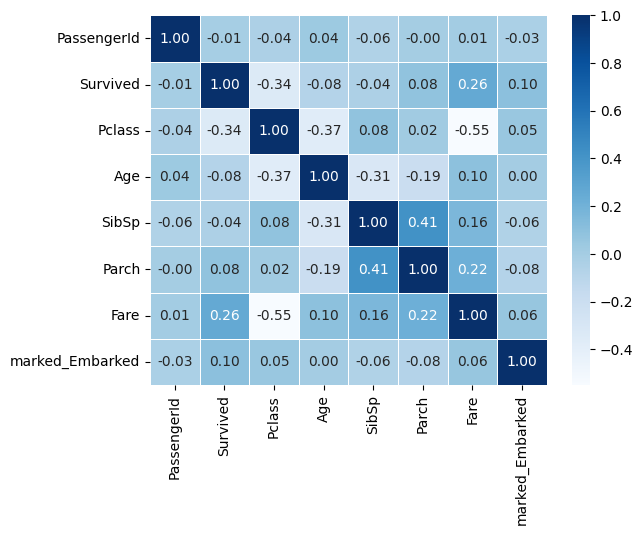

In [23]:
# 상관관계 확인
# titanic.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1).corr()
sns.heatmap(data=titanic.select_dtypes(['number']).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
# 상관성 ≠ 인과성
# A가 증가하고 B도 증가한다.
# A가 증가하면 B도 증가한다.

In [5]:
# 결측치 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. 데이터의 개별 속성 파악하기

- survived Column

In [6]:
# 생존자, 사망자 수
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


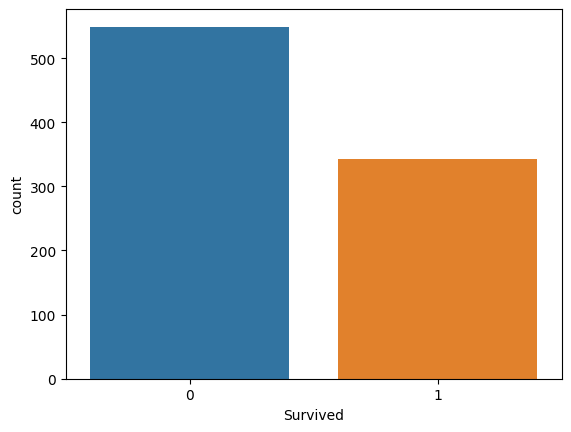

In [7]:
sns.countplot(x='Survived', data= titanic)
plt.show()

- pclass

In [8]:
# Pclass에 따른 인원 파악
titanic[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [9]:
# 생존자 인원, 사망자 인원
titanic[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [10]:
titanic[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


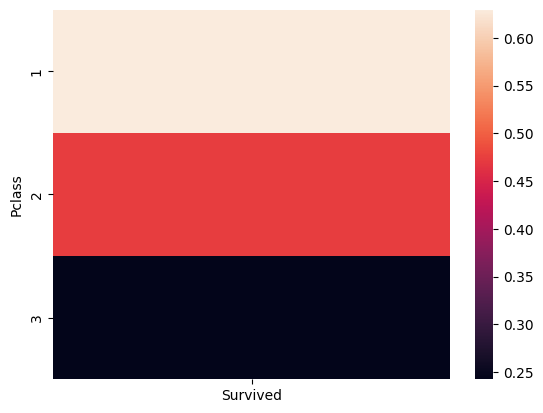

In [11]:
# 히트맵 활용하기
sns.heatmap(titanic[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

- Sex

In [12]:
titanic.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

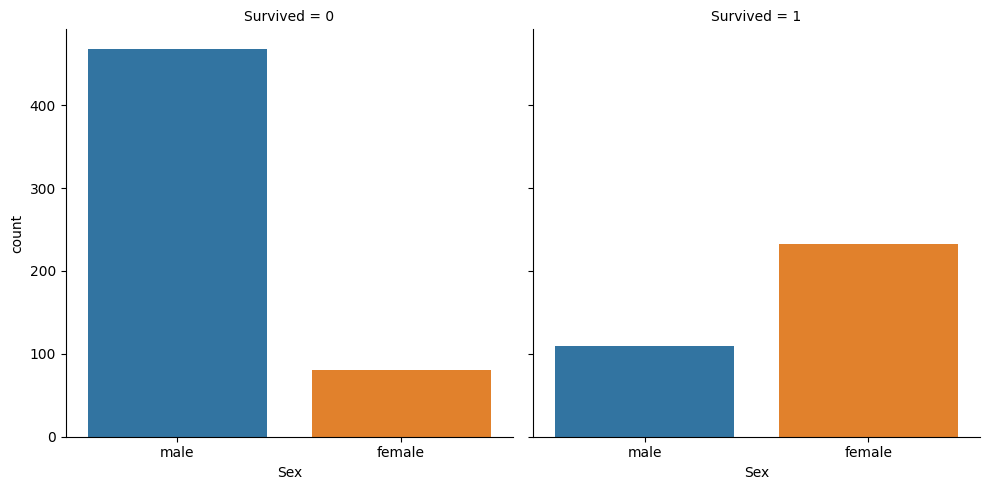

In [13]:
# catplot
sns.catplot(x='Sex', col='Survived' ,kind='count', data= titanic) # col : case분류
plt.show()

- Age
 
결측치가 존재한다!

In [14]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='Age', ylabel='Density'>

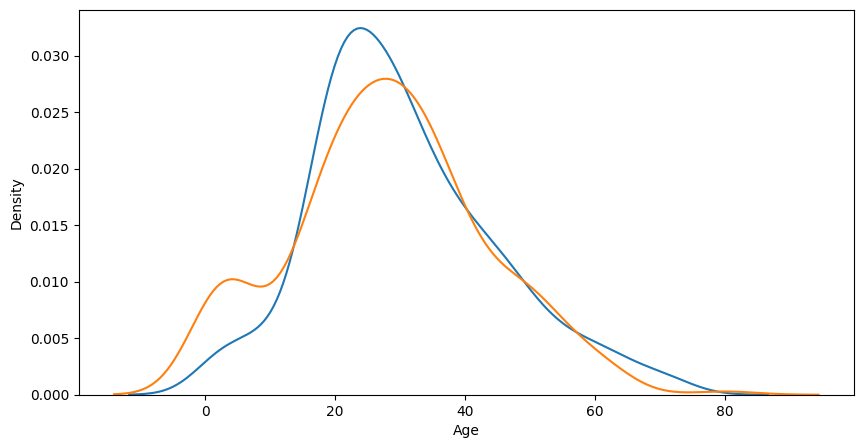

In [15]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(x=titanic[titanic['Survived']==0]['Age'], ax=ax)
sns.kdeplot(x=titanic[titanic['Survived']==1]['Age'], ax=ax)

#### Appendix 1. Sex + Pcalss vs Survived
- 복합적 요소 분석하기 : `catplot`

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

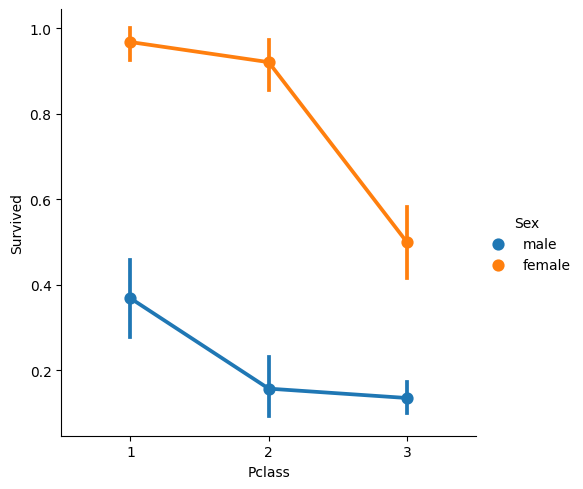

In [16]:
sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='point', data=titanic) # hue: '성별'을 기준으로 나눠 나타냄
plt.show()

#### Apendix 2. Age + Pclass

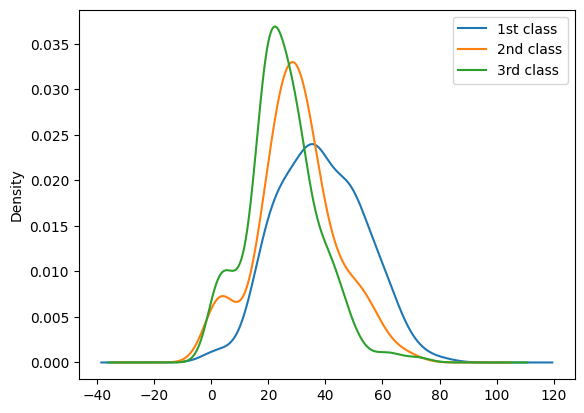

In [17]:
titanic['Age'][titanic['Pclass']==1].plot(kind = 'kde')
titanic['Age'][titanic['Pclass']==2].plot(kind = 'kde')
titanic['Age'][titanic['Pclass']==3].plot(kind = 'kde')
plt.legend(['1st class','2nd class','3rd class'])

plt.show()

<Axes: ylabel='marked_Embarked'>

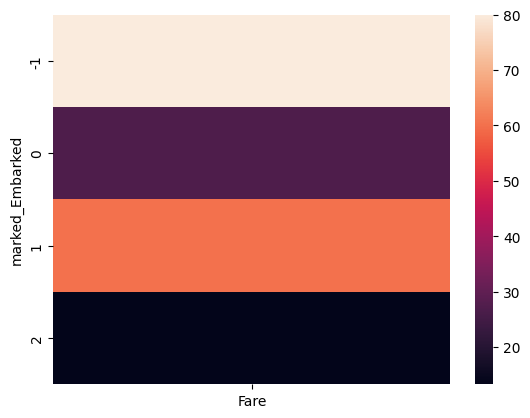

In [18]:
titanic['marked_Embarked'] = titanic['Embarked'].fillna(value='X').apply(lambda x : {'X':-1,'S':0, 'C':1,'Q':2}[x])
sns.heatmap(titanic[['marked_Embarked','Fare']].groupby('marked_Embarked').mean())

# EDA Process

## 1. 분석의 목적과 변수 확인

- 각 열의 데이터 타입 확인.

## 2. 데이터 전체적으로 살펴보기
- 데이터 상관관계, 결측치(NA)확인.

## 3. 데이터의 개별 속성 파악하기
- 데이터 개별 속성 파악.

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?


- Fare - Pclass

In [19]:
titanic[['Pclass','Sex']].groupby(['Pclass']).value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

In [20]:
sns.countplot(x='Pclass', y = 'Fare', data=titanic)
plt.show()

ValueError: Cannot pass values for both `x` and `y`

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

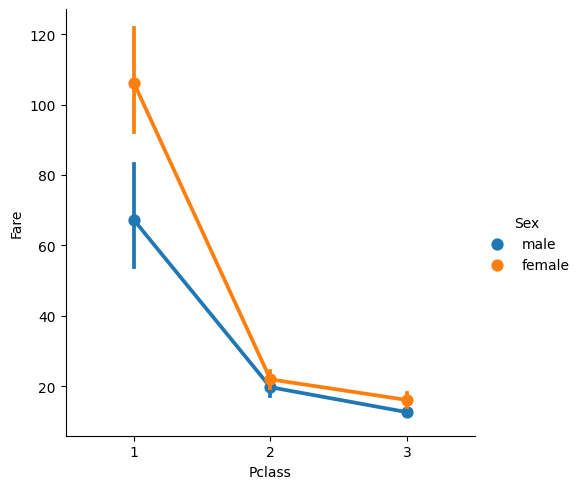

In [ ]:
sns.catplot(x='Pclass', y='Fare',hue='Sex', kind='point', data=titanic)

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

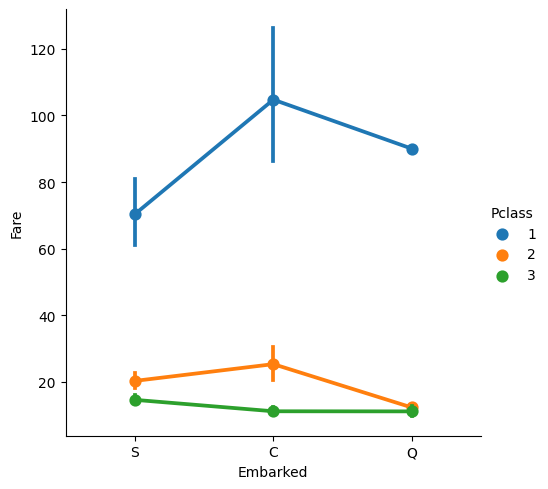

In [ ]:
sns.catplot(x='Embarked', y='Fare',hue='Pclass', kind='point', data=titanic)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0)
color = (t - t.min()) / (t.max() - t.min())

x=titanic['Fare']; y = titanic['Age']; z= titanic['Parch']

data = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    # text = ['point #{}'.format(i) for i in range(x.shape[0])],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)

In [ ]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

In [ ]:
fig = go.Figure(data=[data], layout=layout)
fig


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

- 분석의 목적과 변수 확인 -> 살아남은 사람들은 어떤 특징을 가지고 있을까?

![Alt text](<스크린샷 2023-09-13 오후 5.16.05.png>)
